In [1]:
import numpy as np
import tensorflow as tf
import matplotlib

import matplotlib.pyplot as plt

import random

import sklearn
import matplotlib.pylab as pl
import ot
import ot.plot
import re

/Users/aidensmac/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aidensmac/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aidensmac/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aidensmac/.local/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
def unit_nd_sphere_cont(n, dim = 2):
    mean = np.zeros(dim)
    covariance = np.eye(dim)
    sample = np.random.multivariate_normal(mean = mean, cov = covariance, size = n)
    norm_const = np.sqrt(np.sum(sample**2, axis = 1))
    sphere_sample = sample/norm_const[:, None]
    return sphere_sample

def unit_nd_sphere_disc(n, centers, dim = 2):
    sample_int = np.random.choice(range(len(centers)), size = n)
    sample_sphere = np.zeros((n, dim))
    for i in range(n):
        sample_sphere[i, :] = centers[sample_int[i], :]
    return sample_sphere

In [3]:
def sample_data_gen(DATASET, BATCH_SIZE, SCALE , VARIANCE):

    '''
    while True:

        centers = [np.array([1.,0.]), np.array([-1.,0.]), np.array([0., 1.]), np.array([0.,-1.])]

        dataset = []
        for i in range(batch_size):
            point = np.random.randn(2)*variance
            center = scale*random.choice(centers)
            point[0] += center[0]
            point[1] += center[1]
            dataset.append(point)
        dataset = np.array(dataset, dtype='float32')
        #dataset /= 1.414 # stdev
        yield dataset
    '''
    if DATASET == 'circ_cont':

        variance = VARIANCE

        centers = []
        for j in range(10000):
            center = np.random.randn(2)
            centers.append(center / np.sqrt(center[0]**2 + center[1]**2))
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.randn(2)*variance
                c = random.choice(centers)
                point[0] += c[0]
                point[1] += c[1]
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            yield dataset

    elif DATASET == 'circ_disc':

        centers = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
        circ_disc = unit_nd_sphere_disc(BATCH_SIZE, centers)
        variance = VARIANCE
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                Gauss_point = np.random.randn(2)*variance
                point = random.choice(centers)
                point[0] += Gauss_point[0]
                point[1] += Gauss_point[1]
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            yield dataset
    
    elif DATASET == 'Uniform0_1':
        variance = VARIANCE
        while True: 
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.rand(2)
                Gauss_point = np.random.randn(2)*variance
                point[0] += Gauss_point[0]
                point[1] += Gauss_point[1]
                dataset.append(point)
            dataset = np.array(dataset, dtype = 'float32')
            yield dataset
            
    elif DATASET == 'Uniform1_2':
        variance = VARIANCE
        while True: 
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.rand(2) + 1
                Gauss_point = np.random.randn(2)*variance
                point[0] += Gauss_point[0]
                point[1] += Gauss_point[1]
                dataset.append(point)
            dataset = np.array(dataset, dtype = 'float32')
            yield dataset


    elif DATASET == '25gaussians':

        dataset = []
        for i in range(100000/25):
            for x in range(-2, 3):
                for y in range(-2, 3):
                    point = np.random.randn(2)*0.05
                    point[0] += 2*x
                    point[1] += 2*y
                    dataset.append(point)
        dataset = np.array(dataset, dtype='float32')
        np.random.shuffle(dataset)
        #dataset /= 2.828 # stdev
        while True:
            for i in range(len(dataset)/BATCH_SIZE):
                yield dataset[i*BATCH_SIZE:(i+1)*BATCH_SIZE]

    elif DATASET == 'swissroll':

        while True:
            data = sklearn.datasets.make_swiss_roll(
                n_samples=BATCH_SIZE, 
                noise=0.25
            )[0]
            data = data.astype('float32')[:, [0, 2]]
            #data /= 7.5 # stdev plus a little
            yield data

    elif DATASET == '4gaussians':
        variance = VARIANCE
        centers = [
            (1, 0),
            (-1, 0),
            (0, 1),
            (0, -1)
        ]
        centers = [(x, y) for x, y in centers]
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.randn(2)*variance
                center = random.choice(centers)
                point[0] += center[0]
                point[1] += center[1]
                dataset.append(point)
            dataset = np.array(dataset, dtype = 'float32')
            yield dataset

    elif DATASET == '8gaussians':

        scale = SCALE
        variance = VARIANCE
        centers = [
            (1,0),
            (-1,0),
            (0,1),
            (0,-1),
            (1./np.sqrt(2), 1./np.sqrt(2)),
            (1./np.sqrt(2), -1./np.sqrt(2)),
            (-1./np.sqrt(2), 1./np.sqrt(2)),
            (-1./np.sqrt(2), -1./np.sqrt(2))
        ]
        centers = [(scale*x,scale*y) for x,y in centers]
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.randn(2)*variance
                center = random.choice(centers)
                point[0] += center[0]
                point[1] += center[1]
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET == 'checker_board_five':

        scale = SCALE
        variance = VARIANCE
        centers = scale*np.array([[0,0], [1,1],[-1,1], [-1,-1],[1,-1]])
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                dataset.append(generate_uniform_around_centers(centers,variance))
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET == 'checker_board_four':

        scale = SCALE
        variance = VARIANCE
        centers = scale*np.array([[1,0],[0,1], [-1,0],[0,-1]])
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                dataset.append(generate_uniform_around_centers(centers,variance))
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset


    elif DATASET =='simpleGaussian':

        variance = VARIANCE

        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.randn(2) * variance
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET =='unif_square':

        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = np.random.uniform(-VARIANCE,VARIANCE,2)
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET =='simpletranslatedGaussian':

        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = SCALE*np.array([1.,1.])+np.random.randn(2)
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET =='simpletranslated_scaled_Gaussian':

        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                point = SCALE*np.array([1.,1.])+VARIANCE*np.random.randn(2)
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET =='circle-S1':

        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                angle = np.random.rand()*2*np.pi
                point = SCALE*np.array([np.cos(angle), np.sin(angle)])
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            yield dataset

    elif DATASET =='semi-circle-S1':

        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                angle = np.random.rand()*np.pi
                point = SCALE*np.array([np.cos(angle), np.sin(angle)])
                dataset.append(point)
            dataset = np.array(dataset, dtype='float32')
            yield dataset

    elif DATASET == 'checker_board_five_cross':

        scale = SCALE
        variance = VARIANCE
        centers = scale*np.array([[0,0], [1,1],[-1,1], [-1,-1],[1,-1]])
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                dataset.append(generate_cross(centers,variance))
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

    elif DATASET == 'checker_board_five_expanded':

        scale = SCALE
        variance = 2*VARIANCE
        centers = scale*np.array([[0,0], [1,1],[-1,1], [-1,-1],[1,-1]])
        while True:
            dataset = []
            for i in range(BATCH_SIZE):
                dataset.append(generate_uniform_around_centers(centers,variance))
            dataset = np.array(dataset, dtype='float32')
            #dataset /= 1.414 # stdev
            yield dataset

In [4]:
def python_OT(X,Y, n):
    a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples
    # loss matrix
    M = ot.dist(Y, X)
    scaling = M.max()
    M /= M.max()

    G0 = ot.emd(a, b, M, numItermax = 10000000)

    return 0.5 * scaling*sum(sum(G0*M)) #0.5 to account for the half quadratic cost

In [5]:
sample_size = [1000, 2000, 4000, 8000, 10000, 15000]
X_set = []
Y_set = []
for i in range(len(sample_size)):
    X_set.append(next(sample_data_gen("circ_disc", sample_size[i], 0, 0)))
    Y_set.append(next(sample_data_gen("circ_cont", sample_size[i], 0, 0)))

In [7]:
X_set[0]

array([[ 0.,  1.],
       [-1.,  0.],
       [-1.,  0.],
       ...,
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]], dtype=float32)

In [9]:
rep = 40
sample_size = [1000, 2000, 4000, 8000, 10000, 15000]
OT_GT = np.zeros((rep, len(sample_size)))
for i in range(rep):
    for j in range(len(sample_size)):
        
        X_test = next(sample_data_gen("circ_disc", sample_size[j], 0, 0))
        Y_test = next(sample_data_gen("circ_cont", sample_size[j], 0, 0))
        n = len(X_test)
        OT_GT[i, j] = python_OT(X_test, Y_test, n)

In [ ]:
X_test = next(sample_data_gen("simpleGaussian", 5000, 1, 1))
Y_test = next(sample_data_gen("simpletranslatedGaussian", 5000, 1, 1))
n = len(X_test)
python_OT(X_test, Y_test, n)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/envs/python3.6/lib/python3.6/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/opt/anaconda3/envs/python3.6/lib/python3.6/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.b

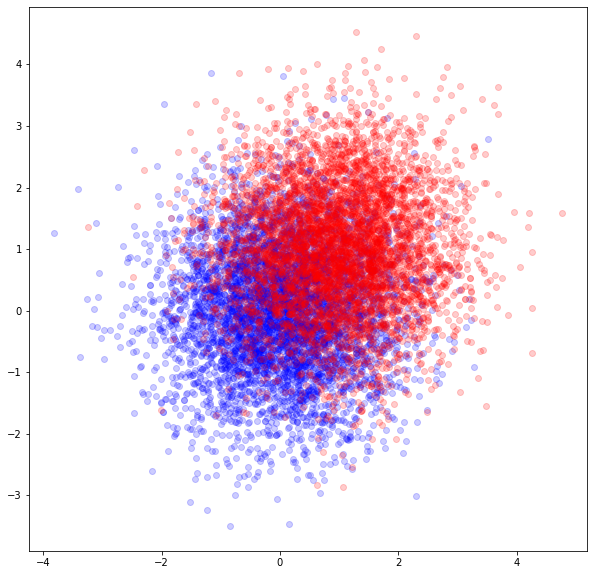

In [65]:
plt.figure(figsize = (10, 10))
plt.scatter(X_test[:, 0], X_test[:, 1], color = "blue", alpha = 0.2)
plt.scatter(Y_test[:, 0], Y_test[:, 1], color = "red", alpha = 0.2)
plt.show()

In [10]:
otmean = np.mean(OT_GT, axis = 0)
otstd = np.std(OT_GT, axis = 0)

In [11]:
plot_X = np.tile(sample_size, (rep, 1))

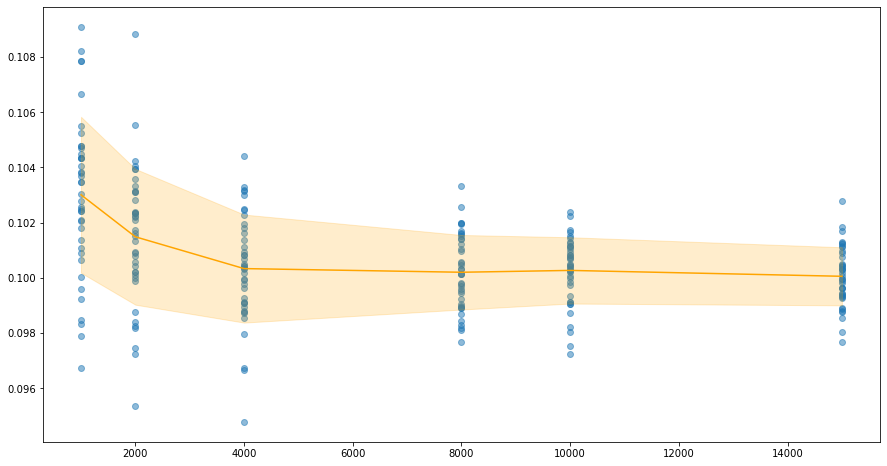

In [13]:
plt.figure(figsize = (15, 8))
plt.scatter(plot_X.flatten(), OT_GT.flatten(), alpha = 0.5)
plt.plot(sample_size, otmean, color = "orange")
plt.fill_between(sample_size, otmean - otstd, otmean + otstd, alpha = 0.2, color = "orange")
plt.show()

In [5]:
import subprocess

In [ ]:
processes = []
scripts = [
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 0 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 1 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 2 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 3 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 4 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 5 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 6 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 7 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 8 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 9 --LR 1e-4',
    'python W2-minimax-tf.py --ITERS 60000 --TRIAL 10 --LR 1e-4'
]

for script in scripts:
    p = subprocess.Popen(script, shell = True)
    processes.append(p)

for p in processes:
    p.wait()

In [5]:
rep = 10
for i in range(rep):
    %run W2-minimax-tf.py --ITERS 60000 --TRIAL $i --LR 5e-5

Namespace(BATCH_SIZE=1024, DATASET_X='circ_disc', DATASET_Y='circ_cont', DRAW_THE_ARROWS=False, INPUT_DIM=2, ITERS=40000, LAMBDA=10, LR=5e-05, NUM_LAYERS=4, NUM_NEURON=32, N_CPU=8, N_GENERATOR_ITERS=10, N_PLOT=512, N_TEST=10000, SCALE=1.0, SHOW_THE_PLOT=False, TRIAL=0, VARIANCE=0)
specify the convex function class
[32, 32, 32, 32, 1]
Define the test set
data_gen_x created
data_gen_y created
Plotting data created
Iterations = 0, f_loss = -0.0096, g_loss = 0.0109, W2 = 0.8046
Iterations = 100, f_loss = -0.0681, g_loss = -0.1808, W2 = 0.4851
Iterations = 200, f_loss = -0.3341, g_loss = -6.1506, W2 = -5.5302
Iterations = 300, f_loss = -1.4398, g_loss = -34.9907, W2 = -34.4318
Iterations = 400, f_loss = -11.0860, g_loss = -102.3666, W2 = -101.8242
Iterations = 500, f_loss = -6.3671, g_loss = -77.0493, W2 = -76.5805
Iterations = 600, f_loss = -5.5032, g_loss = -54.2010, W2 = -53.7925
Iterations = 700, f_loss = -4.9550, g_loss = -34.7313, W2 = -34.4148
Iterations = 800, f_loss = -4.8197, g_lo

Iterations = 11800, f_loss = 0.0024, g_loss = 3.6029, W2 = 0.1419
Iterations = 11900, f_loss = -0.0024, g_loss = 3.6050, W2 = 0.1382
Iterations = 12000, f_loss = 0.0002, g_loss = 3.6109, W2 = 0.1389
Iterations = 12100, f_loss = 0.0019, g_loss = 3.6370, W2 = 0.1432
Iterations = 12200, f_loss = -0.0018, g_loss = 3.6462, W2 = 0.1413
Iterations = 12300, f_loss = 0.0005, g_loss = 3.6615, W2 = 0.1370
Iterations = 12400, f_loss = 0.0002, g_loss = 3.6794, W2 = 0.1363
Iterations = 12500, f_loss = -0.0025, g_loss = 3.6928, W2 = 0.1387
Iterations = 12600, f_loss = -0.0011, g_loss = 3.7210, W2 = 0.1445
Iterations = 12700, f_loss = -0.0019, g_loss = 3.7356, W2 = 0.1411
Iterations = 12800, f_loss = 0.0002, g_loss = 3.7494, W2 = 0.1347
Iterations = 12900, f_loss = -0.0011, g_loss = 3.7698, W2 = 0.1361
Iterations = 13000, f_loss = -0.0026, g_loss = 3.7933, W2 = 0.1404
Iterations = 13100, f_loss = -0.0022, g_loss = 3.8124, W2 = 0.1416
Iterations = 13200, f_loss = 0.0021, g_loss = 3.8245, W2 = 0.1347
It

Iterations = 24200, f_loss = 0.0083, g_loss = 4.4566, W2 = 0.0933
Iterations = 24300, f_loss = 0.0014, g_loss = 4.5147, W2 = 0.1073
Iterations = 24400, f_loss = 0.0035, g_loss = 4.4914, W2 = 0.0952
Iterations = 24500, f_loss = -0.0042, g_loss = 4.5345, W2 = 0.1024
Iterations = 24600, f_loss = -0.0076, g_loss = 4.5688, W2 = 0.1044
Iterations = 24700, f_loss = 0.0086, g_loss = 4.5452, W2 = 0.0976
Iterations = 24800, f_loss = -0.0187, g_loss = 4.5173, W2 = 0.1193
Iterations = 24900, f_loss = -0.0094, g_loss = 4.5422, W2 = 0.1170
Iterations = 25000, f_loss = -0.0018, g_loss = 4.4818, W2 = 0.1034
Iterations = 25100, f_loss = 0.0089, g_loss = 4.4643, W2 = 0.0896
Iterations = 25200, f_loss = 0.0176, g_loss = 4.4512, W2 = 0.0925
Iterations = 25300, f_loss = 0.0039, g_loss = 4.4132, W2 = 0.1058
Iterations = 25400, f_loss = 0.0110, g_loss = 4.4127, W2 = 0.0916
Iterations = 25500, f_loss = -0.0004, g_loss = 4.4194, W2 = 0.0969
Iterations = 25600, f_loss = 0.0028, g_loss = 4.4279, W2 = 0.1009
Iter

Iterations = 36600, f_loss = 0.0246, g_loss = 4.2787, W2 = 0.0777
Iterations = 36700, f_loss = -0.0056, g_loss = 4.3088, W2 = 0.1101
Iterations = 36800, f_loss = -0.0010, g_loss = 4.3003, W2 = 0.1037
Iterations = 36900, f_loss = 0.0139, g_loss = 4.2669, W2 = 0.0849
Iterations = 37000, f_loss = -0.0095, g_loss = 4.3017, W2 = 0.1091
Iterations = 37100, f_loss = 0.0147, g_loss = 4.2730, W2 = 0.0845
Iterations = 37200, f_loss = -0.0006, g_loss = 4.2683, W2 = 0.1042
Iterations = 37300, f_loss = 0.0096, g_loss = 4.2582, W2 = 0.0879
Iterations = 37400, f_loss = 0.0042, g_loss = 4.2387, W2 = 0.0978
Iterations = 37500, f_loss = -0.0045, g_loss = 4.2604, W2 = 0.1063
Iterations = 37600, f_loss = -0.0025, g_loss = 4.2767, W2 = 0.1035
Iterations = 37700, f_loss = 0.0042, g_loss = 4.2641, W2 = 0.0919
Iterations = 37800, f_loss = -0.0069, g_loss = 4.2956, W2 = 0.1065
Iterations = 37900, f_loss = 0.0042, g_loss = 4.2717, W2 = 0.0965
Iterations = 38000, f_loss = 0.0025, g_loss = 4.2862, W2 = 0.1012
Ite

Iterations = 8200, f_loss = 0.0020, g_loss = 3.1409, W2 = 0.1459
Iterations = 8300, f_loss = -0.0030, g_loss = 3.1460, W2 = 0.1409
Iterations = 8400, f_loss = -0.0018, g_loss = 3.1644, W2 = 0.1427
Iterations = 8500, f_loss = -0.0020, g_loss = 3.1688, W2 = 0.1394
Iterations = 8600, f_loss = -0.0013, g_loss = 3.1765, W2 = 0.1437
Iterations = 8700, f_loss = -0.0016, g_loss = 3.1916, W2 = 0.1388
Iterations = 8800, f_loss = -0.0015, g_loss = 3.1984, W2 = 0.1440
Iterations = 8900, f_loss = -0.0016, g_loss = 3.2254, W2 = 0.1473
Iterations = 9000, f_loss = 0.0018, g_loss = 3.2329, W2 = 0.1365
Iterations = 9100, f_loss = -0.0007, g_loss = 3.2588, W2 = 0.1469
Iterations = 9200, f_loss = -0.0009, g_loss = 3.2620, W2 = 0.1420
Iterations = 9300, f_loss = -0.0017, g_loss = 3.2785, W2 = 0.1398
Iterations = 9400, f_loss = 0.0001, g_loss = 3.2928, W2 = 0.1368
Iterations = 9500, f_loss = -0.0018, g_loss = 3.3097, W2 = 0.1431
Iterations = 9600, f_loss = -0.0023, g_loss = 3.3306, W2 = 0.1446
Iterations = 

Iterations = 20600, f_loss = -0.0049, g_loss = 5.3969, W2 = 0.1407
Iterations = 20700, f_loss = 0.0028, g_loss = 5.4102, W2 = 0.1360
Iterations = 20800, f_loss = -0.0078, g_loss = 5.4181, W2 = 0.1424
Iterations = 20900, f_loss = 0.0031, g_loss = 5.4404, W2 = 0.1396
Iterations = 21000, f_loss = 0.0008, g_loss = 5.4574, W2 = 0.1371
Iterations = 21100, f_loss = -0.0002, g_loss = 5.4984, W2 = 0.1429
Iterations = 21200, f_loss = -0.0047, g_loss = 5.5190, W2 = 0.1477
Iterations = 21300, f_loss = -0.0057, g_loss = 5.5583, W2 = 0.1465
Iterations = 21400, f_loss = -0.0007, g_loss = 5.5903, W2 = 0.1432
Iterations = 21500, f_loss = -0.0025, g_loss = 5.6383, W2 = 0.1475
Iterations = 21600, f_loss = 0.0006, g_loss = 5.6532, W2 = 0.1405
Iterations = 21700, f_loss = -0.0031, g_loss = 5.6736, W2 = 0.1440
Iterations = 21800, f_loss = -0.0002, g_loss = 5.7145, W2 = 0.1394
Iterations = 21900, f_loss = -0.0015, g_loss = 5.7485, W2 = 0.1444
Iterations = 22000, f_loss = 0.0020, g_loss = 5.7723, W2 = 0.1435


Iterations = 32900, f_loss = 0.0121, g_loss = 6.9072, W2 = 0.0877
Iterations = 33000, f_loss = -0.0059, g_loss = 6.9115, W2 = 0.1045
Iterations = 33100, f_loss = 0.0024, g_loss = 6.8968, W2 = 0.1006
Iterations = 33200, f_loss = -0.0032, g_loss = 6.9019, W2 = 0.1060
Iterations = 33300, f_loss = -0.0076, g_loss = 6.9238, W2 = 0.1084
Iterations = 33400, f_loss = 0.0098, g_loss = 6.9027, W2 = 0.0924
Iterations = 33500, f_loss = -0.0006, g_loss = 6.9246, W2 = 0.1022
Iterations = 33600, f_loss = -0.0024, g_loss = 6.9299, W2 = 0.1066
Iterations = 33700, f_loss = 0.0075, g_loss = 6.8829, W2 = 0.0962
Iterations = 33800, f_loss = -0.0042, g_loss = 6.9040, W2 = 0.1076
Iterations = 33900, f_loss = -0.0069, g_loss = 6.8909, W2 = 0.1147
Iterations = 34000, f_loss = 0.0043, g_loss = 6.8649, W2 = 0.1026
Iterations = 34100, f_loss = 0.0011, g_loss = 6.8638, W2 = 0.0953
Iterations = 34200, f_loss = 0.0006, g_loss = 6.8756, W2 = 0.1040
Iterations = 34300, f_loss = 0.0008, g_loss = 6.8721, W2 = 0.1005
Ite

Iterations = 4500, f_loss = -0.0034, g_loss = 2.3052, W2 = 0.1304
Iterations = 4600, f_loss = -0.0041, g_loss = 2.3551, W2 = 0.1392
Iterations = 4700, f_loss = -0.0001, g_loss = 2.3903, W2 = 0.1363
Iterations = 4800, f_loss = -0.0009, g_loss = 2.4241, W2 = 0.1342
Iterations = 4900, f_loss = 0.0000, g_loss = 2.4505, W2 = 0.1395
Iterations = 5000, f_loss = 0.0004, g_loss = 2.4637, W2 = 0.1327
Iterations = 5100, f_loss = -0.0025, g_loss = 2.4967, W2 = 0.1416
Iterations = 5200, f_loss = -0.0037, g_loss = 2.5163, W2 = 0.1367
Iterations = 5300, f_loss = -0.0025, g_loss = 2.5397, W2 = 0.1362
Iterations = 5400, f_loss = -0.0003, g_loss = 2.5764, W2 = 0.1418
Iterations = 5500, f_loss = 0.0002, g_loss = 2.5946, W2 = 0.1324
Iterations = 5600, f_loss = -0.0043, g_loss = 2.6116, W2 = 0.1334
Iterations = 5700, f_loss = -0.0008, g_loss = 2.6395, W2 = 0.1370
Iterations = 5800, f_loss = -0.0030, g_loss = 2.6626, W2 = 0.1362
Iterations = 5900, f_loss = -0.0035, g_loss = 2.6919, W2 = 0.1427
Iterations = 

Iterations = 16900, f_loss = 0.0001, g_loss = 4.4856, W2 = 0.1434
Iterations = 17000, f_loss = -0.0001, g_loss = 4.4930, W2 = 0.1469
Iterations = 17100, f_loss = 0.0001, g_loss = 4.5257, W2 = 0.1526
Iterations = 17200, f_loss = -0.0026, g_loss = 4.5459, W2 = 0.1512
Iterations = 17300, f_loss = -0.0005, g_loss = 4.5552, W2 = 0.1462
Iterations = 17400, f_loss = 0.0003, g_loss = 4.5821, W2 = 0.1484
Iterations = 17500, f_loss = -0.0025, g_loss = 4.5893, W2 = 0.1468
Iterations = 17600, f_loss = -0.0008, g_loss = 4.5982, W2 = 0.1431
Iterations = 17700, f_loss = -0.0016, g_loss = 4.6262, W2 = 0.1505
Iterations = 17800, f_loss = -0.0012, g_loss = 4.6352, W2 = 0.1427
Iterations = 17900, f_loss = -0.0009, g_loss = 4.6492, W2 = 0.1441
Iterations = 18000, f_loss = -0.0010, g_loss = 4.6628, W2 = 0.1418
Iterations = 18100, f_loss = -0.0013, g_loss = 4.6803, W2 = 0.1406
Iterations = 18200, f_loss = -0.0007, g_loss = 4.6910, W2 = 0.1416
Iterations = 18300, f_loss = -0.0019, g_loss = 4.7260, W2 = 0.149

Iterations = 29200, f_loss = 0.0006, g_loss = 7.1734, W2 = 0.1407
Iterations = 29300, f_loss = -0.0022, g_loss = 7.1874, W2 = 0.1400
Iterations = 29400, f_loss = -0.0024, g_loss = 7.2424, W2 = 0.1425
Iterations = 29500, f_loss = 0.0017, g_loss = 7.2254, W2 = 0.1346
Iterations = 29600, f_loss = -0.0027, g_loss = 7.2412, W2 = 0.1410
Iterations = 29700, f_loss = -0.0038, g_loss = 7.2590, W2 = 0.1451
Iterations = 29800, f_loss = 0.0013, g_loss = 7.2847, W2 = 0.1385
Iterations = 29900, f_loss = -0.0072, g_loss = 7.3100, W2 = 0.1494
Iterations = 30000, f_loss = -0.0031, g_loss = 7.3247, W2 = 0.1393
Iterations = 30100, f_loss = 0.0025, g_loss = 7.3471, W2 = 0.1303
Iterations = 30200, f_loss = -0.0040, g_loss = 7.3857, W2 = 0.1376
Iterations = 30300, f_loss = -0.0067, g_loss = 7.4073, W2 = 0.1481
Iterations = 30400, f_loss = 0.0073, g_loss = 7.4052, W2 = 0.1323
Iterations = 30500, f_loss = -0.0043, g_loss = 7.4032, W2 = 0.1392
Iterations = 30600, f_loss = -0.0032, g_loss = 7.4312, W2 = 0.1409


Iterations = 800, f_loss = -4.6756, g_loss = -21.7197, W2 = -21.5167
Iterations = 900, f_loss = -4.3410, g_loss = -13.7715, W2 = -13.6738
Iterations = 1000, f_loss = -3.8216, g_loss = -7.8309, W2 = -7.8415
Iterations = 1100, f_loss = -2.8655, g_loss = -3.5853, W2 = -3.6646
Iterations = 1200, f_loss = -1.9667, g_loss = -1.2065, W2 = -1.4064
Iterations = 1300, f_loss = -0.9484, g_loss = 0.0252, W2 = -0.3325
Iterations = 1400, f_loss = -0.1349, g_loss = 0.5168, W2 = -0.0331
Iterations = 1500, f_loss = -0.0460, g_loss = 0.5714, W2 = 0.0032
Iterations = 1600, f_loss = 0.0059, g_loss = 0.6174, W2 = 0.0069
Iterations = 1700, f_loss = -0.0272, g_loss = 0.6848, W2 = 0.0275
Iterations = 1800, f_loss = -0.0246, g_loss = 0.7477, W2 = 0.0478
Iterations = 1900, f_loss = -0.0130, g_loss = 0.8194, W2 = 0.0323
Iterations = 2000, f_loss = -0.0135, g_loss = 0.8936, W2 = 0.0651
Iterations = 2100, f_loss = -0.0032, g_loss = 0.9493, W2 = 0.0598
Iterations = 2200, f_loss = -0.0170, g_loss = 1.0269, W2 = 0.07

Iterations = 13200, f_loss = -0.0020, g_loss = 4.0214, W2 = 0.1401
Iterations = 13300, f_loss = 0.0010, g_loss = 4.0285, W2 = 0.1389
Iterations = 13400, f_loss = 0.0020, g_loss = 4.0471, W2 = 0.1494
Iterations = 13500, f_loss = -0.0039, g_loss = 4.0698, W2 = 0.1487
Iterations = 13600, f_loss = -0.0054, g_loss = 4.1258, W2 = 0.1563
Iterations = 13700, f_loss = -0.0012, g_loss = 4.1372, W2 = 0.1411
Iterations = 13800, f_loss = -0.0025, g_loss = 4.1384, W2 = 0.1451
Iterations = 13900, f_loss = -0.0015, g_loss = 4.1486, W2 = 0.1437
Iterations = 14000, f_loss = 0.0016, g_loss = 4.1563, W2 = 0.1454
Iterations = 14100, f_loss = -0.0019, g_loss = 4.1744, W2 = 0.1480
Iterations = 14200, f_loss = -0.0037, g_loss = 4.1905, W2 = 0.1457
Iterations = 14300, f_loss = 0.0010, g_loss = 4.2104, W2 = 0.1428
Iterations = 14400, f_loss = -0.0026, g_loss = 4.2352, W2 = 0.1505
Iterations = 14500, f_loss = -0.0012, g_loss = 4.2535, W2 = 0.1453
Iterations = 14600, f_loss = -0.0022, g_loss = 4.2754, W2 = 0.1424

Iterations = 25500, f_loss = 0.0029, g_loss = 7.1318, W2 = 0.1456
Iterations = 25600, f_loss = 0.0010, g_loss = 7.1394, W2 = 0.1406
Iterations = 25700, f_loss = -0.0018, g_loss = 7.1580, W2 = 0.1468
Iterations = 25800, f_loss = 0.0010, g_loss = 7.2077, W2 = 0.1468
Iterations = 25900, f_loss = -0.0029, g_loss = 7.2149, W2 = 0.1478
Iterations = 26000, f_loss = -0.0031, g_loss = 7.2549, W2 = 0.1476
Iterations = 26100, f_loss = 0.0018, g_loss = 7.2835, W2 = 0.1441
Iterations = 26200, f_loss = -0.0085, g_loss = 7.3007, W2 = 0.1457
Iterations = 26300, f_loss = -0.0057, g_loss = 7.3259, W2 = 0.1462
Iterations = 26400, f_loss = -0.0006, g_loss = 7.3545, W2 = 0.1451
Iterations = 26500, f_loss = 0.0096, g_loss = 7.3869, W2 = 0.1334
Iterations = 26600, f_loss = -0.0027, g_loss = 7.4100, W2 = 0.1497
Iterations = 26700, f_loss = -0.0061, g_loss = 7.4367, W2 = 0.1557
Iterations = 26800, f_loss = -0.0012, g_loss = 7.4408, W2 = 0.1437
Iterations = 26900, f_loss = -0.0061, g_loss = 7.4897, W2 = 0.1574


Iterations = 37800, f_loss = -0.0029, g_loss = 9.5602, W2 = 0.1411
Iterations = 37900, f_loss = -0.0121, g_loss = 9.6007, W2 = 0.1510
Iterations = 38000, f_loss = -0.0130, g_loss = 9.6131, W2 = 0.1461
Iterations = 38100, f_loss = -0.0060, g_loss = 9.6101, W2 = 0.1512
Iterations = 38200, f_loss = 0.0004, g_loss = 9.6182, W2 = 0.1427
Iterations = 38300, f_loss = -0.0045, g_loss = 9.6350, W2 = 0.1417
Iterations = 38400, f_loss = -0.0000, g_loss = 9.6541, W2 = 0.1359
Iterations = 38500, f_loss = 0.0027, g_loss = 9.6542, W2 = 0.1336
Iterations = 38600, f_loss = 0.0028, g_loss = 9.6793, W2 = 0.1388
Iterations = 38700, f_loss = 0.0026, g_loss = 9.6978, W2 = 0.1357
Iterations = 38800, f_loss = -0.0062, g_loss = 9.7119, W2 = 0.1412
Iterations = 38900, f_loss = 0.0009, g_loss = 9.7369, W2 = 0.1478
Iterations = 39000, f_loss = 0.0047, g_loss = 9.7409, W2 = 0.1309
Iterations = 39100, f_loss = 0.0028, g_loss = 9.7816, W2 = 0.1424
Iterations = 39200, f_loss = -0.0008, g_loss = 9.7907, W2 = 0.1391
It

Iterations = 9500, f_loss = -0.0033, g_loss = 3.1927, W2 = 0.1381
Iterations = 9600, f_loss = 0.0012, g_loss = 3.2091, W2 = 0.1380
Iterations = 9700, f_loss = -0.0017, g_loss = 3.2199, W2 = 0.1443
Iterations = 9800, f_loss = -0.0014, g_loss = 3.2319, W2 = 0.1359
Iterations = 9900, f_loss = 0.0011, g_loss = 3.2521, W2 = 0.1372
Iterations = 10000, f_loss = 0.0013, g_loss = 3.2567, W2 = 0.1390
Iterations = 10100, f_loss = -0.0037, g_loss = 3.2768, W2 = 0.1459
Iterations = 10200, f_loss = -0.0018, g_loss = 3.2808, W2 = 0.1373
Iterations = 10300, f_loss = -0.0025, g_loss = 3.3048, W2 = 0.1404
Iterations = 10400, f_loss = -0.0031, g_loss = 3.3362, W2 = 0.1473
Iterations = 10500, f_loss = -0.0043, g_loss = 3.3314, W2 = 0.1358
Iterations = 10600, f_loss = 0.0007, g_loss = 3.3601, W2 = 0.1463
Iterations = 10700, f_loss = -0.0017, g_loss = 3.3727, W2 = 0.1431
Iterations = 10800, f_loss = 0.0022, g_loss = 3.3746, W2 = 0.1374
Iterations = 10900, f_loss = -0.0008, g_loss = 3.3872, W2 = 0.1365
Itera

Iterations = 21800, f_loss = -0.0014, g_loss = 5.9262, W2 = 0.1419
Iterations = 21900, f_loss = 0.0016, g_loss = 5.9533, W2 = 0.1394
Iterations = 22000, f_loss = 0.0008, g_loss = 5.9716, W2 = 0.1375
Iterations = 22100, f_loss = 0.0014, g_loss = 6.0067, W2 = 0.1316
Iterations = 22200, f_loss = -0.0010, g_loss = 6.0262, W2 = 0.1405
Iterations = 22300, f_loss = -0.0058, g_loss = 6.0655, W2 = 0.1369
Iterations = 22400, f_loss = -0.0033, g_loss = 6.0926, W2 = 0.1350
Iterations = 22500, f_loss = -0.0042, g_loss = 6.1257, W2 = 0.1429
Iterations = 22600, f_loss = 0.0012, g_loss = 6.1600, W2 = 0.1380
Iterations = 22700, f_loss = 0.0047, g_loss = 6.1728, W2 = 0.1363
Iterations = 22800, f_loss = -0.0022, g_loss = 6.1982, W2 = 0.1435
Iterations = 22900, f_loss = -0.0045, g_loss = 6.2289, W2 = 0.1405
Iterations = 23000, f_loss = -0.0045, g_loss = 6.2616, W2 = 0.1366
Iterations = 23100, f_loss = 0.0014, g_loss = 6.3096, W2 = 0.1421
Iterations = 23200, f_loss = -0.0042, g_loss = 6.3203, W2 = 0.1446
I

Iterations = 34100, f_loss = -0.0074, g_loss = 8.6776, W2 = 0.1362
Iterations = 34200, f_loss = -0.0084, g_loss = 8.7126, W2 = 0.1351
Iterations = 34300, f_loss = -0.0064, g_loss = 8.7819, W2 = 0.1346
Iterations = 34400, f_loss = -0.0120, g_loss = 8.8378, W2 = 0.1419
Iterations = 34500, f_loss = -0.0001, g_loss = 8.8613, W2 = 0.1284
Iterations = 34600, f_loss = 0.0043, g_loss = 8.8951, W2 = 0.1196
Iterations = 34700, f_loss = -0.0066, g_loss = 8.9413, W2 = 0.1302
Iterations = 34800, f_loss = -0.0024, g_loss = 8.9888, W2 = 0.1348
Iterations = 34900, f_loss = -0.0057, g_loss = 9.0264, W2 = 0.1373
Iterations = 35000, f_loss = -0.0032, g_loss = 9.0582, W2 = 0.1388
Iterations = 35100, f_loss = -0.0063, g_loss = 9.0609, W2 = 0.1317
Iterations = 35200, f_loss = -0.0022, g_loss = 9.0845, W2 = 0.1296
Iterations = 35300, f_loss = -0.0048, g_loss = 9.1139, W2 = 0.1261
Iterations = 35400, f_loss = -0.0060, g_loss = 9.1686, W2 = 0.1349
Iterations = 35500, f_loss = 0.0082, g_loss = 9.1818, W2 = 0.11

Iterations = 5700, f_loss = 0.0019, g_loss = 2.8587, W2 = 0.1405
Iterations = 5800, f_loss = -0.0003, g_loss = 2.8612, W2 = 0.1411
Iterations = 5900, f_loss = -0.0012, g_loss = 2.8622, W2 = 0.1344
Iterations = 6000, f_loss = 0.0004, g_loss = 2.8786, W2 = 0.1365
Iterations = 6100, f_loss = 0.0002, g_loss = 2.8827, W2 = 0.1397
Iterations = 6200, f_loss = -0.0018, g_loss = 2.8880, W2 = 0.1323
Iterations = 6300, f_loss = 0.0003, g_loss = 2.8988, W2 = 0.1427
Iterations = 6400, f_loss = 0.0001, g_loss = 2.9088, W2 = 0.1410
Iterations = 6500, f_loss = 0.0028, g_loss = 2.9184, W2 = 0.1340
Iterations = 6600, f_loss = 0.0012, g_loss = 2.9163, W2 = 0.1366
Iterations = 6700, f_loss = -0.0019, g_loss = 2.9513, W2 = 0.1404
Iterations = 6800, f_loss = 0.0004, g_loss = 2.9736, W2 = 0.1336
Iterations = 6900, f_loss = 0.0022, g_loss = 3.0038, W2 = 0.1393
Iterations = 7000, f_loss = 0.0005, g_loss = 3.0122, W2 = 0.1386
Iterations = 7100, f_loss = 0.0005, g_loss = 3.0181, W2 = 0.1338
Iterations = 7200, f_

Iterations = 18100, f_loss = -0.0053, g_loss = 4.4425, W2 = 0.1444
Iterations = 18200, f_loss = -0.0103, g_loss = 4.4856, W2 = 0.1471
Iterations = 18300, f_loss = 0.0033, g_loss = 4.5323, W2 = 0.1291
Iterations = 18400, f_loss = -0.0013, g_loss = 4.5798, W2 = 0.1390
Iterations = 18500, f_loss = 0.0098, g_loss = 4.6142, W2 = 0.1299
Iterations = 18600, f_loss = 0.0012, g_loss = 4.6280, W2 = 0.1355
Iterations = 18700, f_loss = -0.0026, g_loss = 4.6472, W2 = 0.1440
Iterations = 18800, f_loss = -0.0025, g_loss = 4.6272, W2 = 0.1421
Iterations = 18900, f_loss = 0.0064, g_loss = 4.5994, W2 = 0.1343
Iterations = 19000, f_loss = -0.0034, g_loss = 4.5924, W2 = 0.1360
Iterations = 19100, f_loss = -0.0027, g_loss = 4.5860, W2 = 0.1450
Iterations = 19200, f_loss = -0.0016, g_loss = 4.5575, W2 = 0.1401
Iterations = 19300, f_loss = -0.0024, g_loss = 4.5432, W2 = 0.1377
Iterations = 19400, f_loss = -0.0001, g_loss = 4.5455, W2 = 0.1320
Iterations = 19500, f_loss = -0.0048, g_loss = 4.5771, W2 = 0.1376

Iterations = 30500, f_loss = 0.0048, g_loss = 5.9286, W2 = 0.0943
Iterations = 30600, f_loss = -0.0114, g_loss = 5.9407, W2 = 0.1104
Iterations = 30700, f_loss = 0.0010, g_loss = 5.9467, W2 = 0.0966
Iterations = 30800, f_loss = 0.0042, g_loss = 5.9406, W2 = 0.0964
Iterations = 30900, f_loss = 0.0064, g_loss = 5.9482, W2 = 0.0909
Iterations = 31000, f_loss = -0.0199, g_loss = 5.9645, W2 = 0.1246
Iterations = 31100, f_loss = 0.0068, g_loss = 5.9414, W2 = 0.0962
Iterations = 31200, f_loss = -0.0023, g_loss = 5.9715, W2 = 0.1014
Iterations = 31300, f_loss = -0.0141, g_loss = 5.9937, W2 = 0.1210
Iterations = 31400, f_loss = 0.0041, g_loss = 5.9872, W2 = 0.0973
Iterations = 31500, f_loss = 0.0139, g_loss = 5.9763, W2 = 0.0878
Iterations = 31600, f_loss = 0.0114, g_loss = 5.9827, W2 = 0.0933
Iterations = 31700, f_loss = 0.0065, g_loss = 5.9709, W2 = 0.0970
Iterations = 31800, f_loss = -0.0107, g_loss = 5.9916, W2 = 0.1143
Iterations = 31900, f_loss = 0.0063, g_loss = 5.9694, W2 = 0.0931
Itera

Iterations = 2100, f_loss = -0.0089, g_loss = 0.7877, W2 = 0.0707
Iterations = 2200, f_loss = -0.0104, g_loss = 0.8530, W2 = 0.0770
Iterations = 2300, f_loss = -0.0141, g_loss = 0.9320, W2 = 0.0915
Iterations = 2400, f_loss = -0.0065, g_loss = 1.0033, W2 = 0.0888
Iterations = 2500, f_loss = 0.0007, g_loss = 1.0676, W2 = 0.0931
Iterations = 2600, f_loss = -0.0074, g_loss = 1.1162, W2 = 0.0979
Iterations = 2700, f_loss = -0.0070, g_loss = 1.1853, W2 = 0.1034
Iterations = 2800, f_loss = -0.0087, g_loss = 1.2346, W2 = 0.1045
Iterations = 2900, f_loss = -0.0088, g_loss = 1.2982, W2 = 0.1091
Iterations = 3000, f_loss = 0.0016, g_loss = 1.3685, W2 = 0.1096
Iterations = 3100, f_loss = -0.0055, g_loss = 1.4149, W2 = 0.1173
Iterations = 3200, f_loss = -0.0049, g_loss = 1.4568, W2 = 0.1170
Iterations = 3300, f_loss = -0.0049, g_loss = 1.5071, W2 = 0.1173
Iterations = 3400, f_loss = -0.0001, g_loss = 1.5608, W2 = 0.1227
Iterations = 3500, f_loss = -0.0055, g_loss = 1.6158, W2 = 0.1209
Iterations =

Iterations = 14500, f_loss = -0.0081, g_loss = 4.3734, W2 = 0.1516
Iterations = 14600, f_loss = -0.0042, g_loss = 4.4277, W2 = 0.1419
Iterations = 14700, f_loss = -0.0032, g_loss = 4.4977, W2 = 0.1457
Iterations = 14800, f_loss = -0.0016, g_loss = 4.5386, W2 = 0.1494
Iterations = 14900, f_loss = -0.0018, g_loss = 4.5639, W2 = 0.1511
Iterations = 15000, f_loss = 0.0076, g_loss = 4.5837, W2 = 0.1349
Iterations = 15100, f_loss = -0.0009, g_loss = 4.6081, W2 = 0.1470
Iterations = 15200, f_loss = -0.0017, g_loss = 4.6271, W2 = 0.1423
Iterations = 15300, f_loss = -0.0087, g_loss = 4.6698, W2 = 0.1575
Iterations = 15400, f_loss = -0.0028, g_loss = 4.7144, W2 = 0.1507
Iterations = 15500, f_loss = -0.0093, g_loss = 4.7878, W2 = 0.1551
Iterations = 15600, f_loss = 0.0003, g_loss = 4.8039, W2 = 0.1404
Iterations = 15700, f_loss = -0.0041, g_loss = 4.8361, W2 = 0.1484
Iterations = 15800, f_loss = -0.0016, g_loss = 4.8723, W2 = 0.1513
Iterations = 15900, f_loss = -0.0067, g_loss = 4.8833, W2 = 0.14

Iterations = 26800, f_loss = 0.0281, g_loss = 7.4877, W2 = 0.0772
Iterations = 26900, f_loss = 0.0057, g_loss = 7.5314, W2 = 0.0984
Iterations = 27000, f_loss = 0.0157, g_loss = 7.5651, W2 = 0.0935
Iterations = 27100, f_loss = 0.0027, g_loss = 7.5954, W2 = 0.1013
Iterations = 27200, f_loss = 0.0044, g_loss = 7.5929, W2 = 0.1005
Iterations = 27300, f_loss = 0.0071, g_loss = 7.5955, W2 = 0.1049
Iterations = 27400, f_loss = 0.0059, g_loss = 7.6226, W2 = 0.1045
Iterations = 27500, f_loss = -0.0062, g_loss = 7.6354, W2 = 0.1151
Iterations = 27600, f_loss = -0.0069, g_loss = 7.6465, W2 = 0.1140
Iterations = 27700, f_loss = 0.0038, g_loss = 7.6480, W2 = 0.1063
Iterations = 27800, f_loss = -0.0107, g_loss = 7.6546, W2 = 0.1099
Iterations = 27900, f_loss = 0.0110, g_loss = 7.6686, W2 = 0.0916
Iterations = 28000, f_loss = -0.0137, g_loss = 7.6985, W2 = 0.1210
Iterations = 28100, f_loss = -0.0183, g_loss = 7.7552, W2 = 0.1266
Iterations = 28200, f_loss = 0.0126, g_loss = 7.7551, W2 = 0.0939
Itera

Iterations = 39200, f_loss = -0.0125, g_loss = 8.3250, W2 = 0.1184
Iterations = 39300, f_loss = 0.0151, g_loss = 8.2976, W2 = 0.0857
Iterations = 39400, f_loss = -0.0124, g_loss = 8.3320, W2 = 0.1175
Iterations = 39500, f_loss = 0.0152, g_loss = 8.3086, W2 = 0.0956
Iterations = 39600, f_loss = 0.0081, g_loss = 8.2584, W2 = 0.0958
Iterations = 39700, f_loss = 0.0176, g_loss = 8.2290, W2 = 0.0904
Iterations = 39800, f_loss = 0.0101, g_loss = 8.2186, W2 = 0.0943
Iterations = 39900, f_loss = -0.0127, g_loss = 8.2327, W2 = 0.1132
Final Wasserstein distance: 0.10615436732769012
Actual Wasserstein distance: 0.09933901555524247
Namespace(BATCH_SIZE=1024, DATASET_X='circ_disc', DATASET_Y='circ_cont', DRAW_THE_ARROWS=False, INPUT_DIM=2, ITERS=40000, LAMBDA=10, LR=5e-05, NUM_LAYERS=4, NUM_NEURON=32, N_CPU=8, N_GENERATOR_ITERS=10, N_PLOT=512, N_TEST=10000, SCALE=1.0, SHOW_THE_PLOT=False, TRIAL=7, VARIANCE=0)
specify the convex function class
[32, 32, 32, 32, 1]
Define the test set
data_gen_x creat

Iterations = 10900, f_loss = -0.0013, g_loss = 2.9219, W2 = 0.1495
Iterations = 11000, f_loss = -0.0015, g_loss = 2.9300, W2 = 0.1447
Iterations = 11100, f_loss = -0.0022, g_loss = 2.9474, W2 = 0.1438
Iterations = 11200, f_loss = 0.0014, g_loss = 2.9578, W2 = 0.1386
Iterations = 11300, f_loss = -0.0020, g_loss = 2.9732, W2 = 0.1414
Iterations = 11400, f_loss = -0.0004, g_loss = 2.9950, W2 = 0.1432
Iterations = 11500, f_loss = -0.0022, g_loss = 3.0159, W2 = 0.1468
Iterations = 11600, f_loss = -0.0023, g_loss = 3.0356, W2 = 0.1444
Iterations = 11700, f_loss = 0.0002, g_loss = 3.0525, W2 = 0.1468
Iterations = 11800, f_loss = 0.0016, g_loss = 3.0616, W2 = 0.1423
Iterations = 11900, f_loss = -0.0016, g_loss = 3.0809, W2 = 0.1485
Iterations = 12000, f_loss = -0.0037, g_loss = 3.0926, W2 = 0.1456
Iterations = 12100, f_loss = -0.0054, g_loss = 3.1058, W2 = 0.1457
Iterations = 12200, f_loss = -0.0037, g_loss = 3.1325, W2 = 0.1524
Iterations = 12300, f_loss = -0.0033, g_loss = 3.1472, W2 = 0.145

Iterations = 23200, f_loss = -0.0027, g_loss = 5.6308, W2 = 0.1406
Iterations = 23300, f_loss = -0.0007, g_loss = 5.6560, W2 = 0.1398
Iterations = 23400, f_loss = -0.0017, g_loss = 5.6885, W2 = 0.1495
Iterations = 23500, f_loss = -0.0066, g_loss = 5.7114, W2 = 0.1531
Iterations = 23600, f_loss = -0.0035, g_loss = 5.7273, W2 = 0.1429
Iterations = 23700, f_loss = -0.0016, g_loss = 5.7607, W2 = 0.1488
Iterations = 23800, f_loss = -0.0001, g_loss = 5.7853, W2 = 0.1418
Iterations = 23900, f_loss = 0.0012, g_loss = 5.8143, W2 = 0.1429
Iterations = 24000, f_loss = 0.0029, g_loss = 5.8429, W2 = 0.1423
Iterations = 24100, f_loss = 0.0074, g_loss = 5.8529, W2 = 0.1345
Iterations = 24200, f_loss = -0.0042, g_loss = 5.8815, W2 = 0.1483
Iterations = 24300, f_loss = -0.0032, g_loss = 5.9061, W2 = 0.1464
Iterations = 24400, f_loss = -0.0005, g_loss = 5.9305, W2 = 0.1471
Iterations = 24500, f_loss = -0.0013, g_loss = 5.9439, W2 = 0.1464
Iterations = 24600, f_loss = -0.0026, g_loss = 5.9549, W2 = 0.146

Iterations = 35500, f_loss = -0.0015, g_loss = 8.0494, W2 = 0.1422
Iterations = 35600, f_loss = -0.0006, g_loss = 8.0535, W2 = 0.1379
Iterations = 35700, f_loss = -0.0004, g_loss = 8.0696, W2 = 0.1401
Iterations = 35800, f_loss = -0.0013, g_loss = 8.0827, W2 = 0.1374
Iterations = 35900, f_loss = 0.0023, g_loss = 8.0945, W2 = 0.1315
Iterations = 36000, f_loss = 0.0009, g_loss = 8.1108, W2 = 0.1367
Iterations = 36100, f_loss = -0.0093, g_loss = 8.1337, W2 = 0.1411
Iterations = 36200, f_loss = -0.0027, g_loss = 8.1527, W2 = 0.1375
Iterations = 36300, f_loss = -0.0063, g_loss = 8.1781, W2 = 0.1430
Iterations = 36400, f_loss = 0.0007, g_loss = 8.1979, W2 = 0.1407
Iterations = 36500, f_loss = 0.0082, g_loss = 8.2290, W2 = 0.1311
Iterations = 36600, f_loss = -0.0039, g_loss = 8.2342, W2 = 0.1499
Iterations = 36700, f_loss = 0.0004, g_loss = 8.2395, W2 = 0.1333
Iterations = 36800, f_loss = 0.0006, g_loss = 8.2596, W2 = 0.1367
Iterations = 36900, f_loss = -0.0045, g_loss = 8.2659, W2 = 0.1413
I

Iterations = 7100, f_loss = -0.0005, g_loss = 3.1381, W2 = 0.1378
Iterations = 7200, f_loss = -0.0006, g_loss = 3.1711, W2 = 0.1467
Iterations = 7300, f_loss = 0.0018, g_loss = 3.1895, W2 = 0.1453
Iterations = 7400, f_loss = -0.0047, g_loss = 3.2052, W2 = 0.1414
Iterations = 7500, f_loss = -0.0026, g_loss = 3.2092, W2 = 0.1403
Iterations = 7600, f_loss = -0.0009, g_loss = 3.2165, W2 = 0.1383
Iterations = 7700, f_loss = 0.0013, g_loss = 3.2561, W2 = 0.1488
Iterations = 7800, f_loss = -0.0021, g_loss = 3.2590, W2 = 0.1467
Iterations = 7900, f_loss = -0.0000, g_loss = 3.2537, W2 = 0.1370
Iterations = 8000, f_loss = -0.0019, g_loss = 3.2713, W2 = 0.1440
Iterations = 8100, f_loss = 0.0006, g_loss = 3.2746, W2 = 0.1353
Iterations = 8200, f_loss = -0.0008, g_loss = 3.2970, W2 = 0.1427
Iterations = 8300, f_loss = -0.0009, g_loss = 3.2939, W2 = 0.1415
Iterations = 8400, f_loss = -0.0021, g_loss = 3.3016, W2 = 0.1463
Iterations = 8500, f_loss = -0.0014, g_loss = 3.3204, W2 = 0.1407
Iterations = 

Iterations = 19500, f_loss = -0.0211, g_loss = 5.2659, W2 = 0.1262
Iterations = 19600, f_loss = -0.0150, g_loss = 5.2799, W2 = 0.1232
Iterations = 19700, f_loss = -0.0006, g_loss = 5.2722, W2 = 0.1051
Iterations = 19800, f_loss = -0.0077, g_loss = 5.2852, W2 = 0.1123
Iterations = 19900, f_loss = 0.0037, g_loss = 5.2777, W2 = 0.1088
Iterations = 20000, f_loss = 0.0096, g_loss = 5.2417, W2 = 0.0958
Iterations = 20100, f_loss = -0.0104, g_loss = 5.2454, W2 = 0.1115
Iterations = 20200, f_loss = -0.0063, g_loss = 5.2684, W2 = 0.1120
Iterations = 20300, f_loss = 0.0011, g_loss = 5.2611, W2 = 0.0979
Iterations = 20400, f_loss = 0.0093, g_loss = 5.2545, W2 = 0.0987
Iterations = 20500, f_loss = -0.0027, g_loss = 5.2419, W2 = 0.1098
Iterations = 20600, f_loss = 0.0022, g_loss = 5.2620, W2 = 0.0998
Iterations = 20700, f_loss = 0.0019, g_loss = 5.2726, W2 = 0.1067
Iterations = 20800, f_loss = -0.0050, g_loss = 5.2607, W2 = 0.1068
Iterations = 20900, f_loss = 0.0134, g_loss = 5.2709, W2 = 0.0929
It

Iterations = 31900, f_loss = 0.0032, g_loss = 5.7587, W2 = 0.0974
Iterations = 32000, f_loss = -0.0139, g_loss = 5.7618, W2 = 0.1157
Iterations = 32100, f_loss = 0.0052, g_loss = 5.7536, W2 = 0.0962
Iterations = 32200, f_loss = -0.0131, g_loss = 5.7854, W2 = 0.1227
Iterations = 32300, f_loss = -0.0041, g_loss = 5.7623, W2 = 0.1030
Iterations = 32400, f_loss = 0.0068, g_loss = 5.8093, W2 = 0.0917
Iterations = 32500, f_loss = 0.0117, g_loss = 5.8056, W2 = 0.0935
Iterations = 32600, f_loss = 0.0048, g_loss = 5.8150, W2 = 0.1013
Iterations = 32700, f_loss = 0.0104, g_loss = 5.8056, W2 = 0.0893
Iterations = 32800, f_loss = 0.0055, g_loss = 5.8136, W2 = 0.1027
Iterations = 32900, f_loss = -0.0093, g_loss = 5.8473, W2 = 0.1090
Iterations = 33000, f_loss = -0.0013, g_loss = 5.8221, W2 = 0.1051
Iterations = 33100, f_loss = -0.0029, g_loss = 5.8175, W2 = 0.1069
Iterations = 33200, f_loss = 0.0141, g_loss = 5.8121, W2 = 0.0884
Iterations = 33300, f_loss = 0.0049, g_loss = 5.7701, W2 = 0.1031
Iter

Iterations = 3500, f_loss = -0.0032, g_loss = 1.8618, W2 = 0.1165
Iterations = 3600, f_loss = -0.0065, g_loss = 1.9533, W2 = 0.1254
Iterations = 3700, f_loss = -0.0059, g_loss = 2.0244, W2 = 0.1262
Iterations = 3800, f_loss = -0.0047, g_loss = 2.0797, W2 = 0.1266
Iterations = 3900, f_loss = -0.0029, g_loss = 2.1106, W2 = 0.1223
Iterations = 4000, f_loss = 0.0023, g_loss = 2.0936, W2 = 0.1311
Iterations = 4100, f_loss = -0.0000, g_loss = 2.1196, W2 = 0.1341
Iterations = 4200, f_loss = -0.0013, g_loss = 2.1532, W2 = 0.1317
Iterations = 4300, f_loss = -0.0050, g_loss = 2.1985, W2 = 0.1346
Iterations = 4400, f_loss = -0.0015, g_loss = 2.2557, W2 = 0.1337
Iterations = 4500, f_loss = -0.0013, g_loss = 2.2968, W2 = 0.1390
Iterations = 4600, f_loss = -0.0044, g_loss = 2.3269, W2 = 0.1319
Iterations = 4700, f_loss = -0.0027, g_loss = 2.3710, W2 = 0.1344
Iterations = 4800, f_loss = -0.0025, g_loss = 2.4146, W2 = 0.1376
Iterations = 4900, f_loss = -0.0014, g_loss = 2.4482, W2 = 0.1348
Iterations 

Iterations = 15900, f_loss = -0.0037, g_loss = 4.3609, W2 = 0.1454
Iterations = 16000, f_loss = 0.0011, g_loss = 4.3973, W2 = 0.1451
Iterations = 16100, f_loss = -0.0050, g_loss = 4.4461, W2 = 0.1508
Iterations = 16200, f_loss = -0.0008, g_loss = 4.4717, W2 = 0.1427
Iterations = 16300, f_loss = -0.0027, g_loss = 4.5168, W2 = 0.1466
Iterations = 16400, f_loss = 0.0001, g_loss = 4.5554, W2 = 0.1432
Iterations = 16500, f_loss = 0.0011, g_loss = 4.5826, W2 = 0.1457
Iterations = 16600, f_loss = -0.0013, g_loss = 4.5955, W2 = 0.1447
Iterations = 16700, f_loss = 0.0003, g_loss = 4.6215, W2 = 0.1444
Iterations = 16800, f_loss = -0.0010, g_loss = 4.6454, W2 = 0.1475
Iterations = 16900, f_loss = -0.0034, g_loss = 4.6593, W2 = 0.1424
Iterations = 17000, f_loss = -0.0006, g_loss = 4.6960, W2 = 0.1472
Iterations = 17100, f_loss = -0.0046, g_loss = 4.7174, W2 = 0.1450
Iterations = 17200, f_loss = -0.0010, g_loss = 4.7489, W2 = 0.1402
Iterations = 17300, f_loss = -0.0007, g_loss = 4.7921, W2 = 0.1449

Iterations = 28200, f_loss = 0.0001, g_loss = 7.0461, W2 = 0.1495
Iterations = 28300, f_loss = -0.0012, g_loss = 7.0633, W2 = 0.1488
Iterations = 28400, f_loss = -0.0023, g_loss = 7.0686, W2 = 0.1487
Iterations = 28500, f_loss = -0.0034, g_loss = 7.0849, W2 = 0.1519
Iterations = 28600, f_loss = -0.0011, g_loss = 7.1135, W2 = 0.1448
Iterations = 28700, f_loss = -0.0012, g_loss = 7.1612, W2 = 0.1478
Iterations = 28800, f_loss = -0.0025, g_loss = 7.1814, W2 = 0.1486
Iterations = 28900, f_loss = 0.0030, g_loss = 7.2045, W2 = 0.1507
Iterations = 29000, f_loss = 0.0001, g_loss = 7.2043, W2 = 0.1445
Iterations = 29100, f_loss = -0.0001, g_loss = 7.2173, W2 = 0.1467
Iterations = 29200, f_loss = -0.0015, g_loss = 7.2258, W2 = 0.1499
Iterations = 29300, f_loss = 0.0011, g_loss = 7.2287, W2 = 0.1440
Iterations = 29400, f_loss = -0.0012, g_loss = 7.2564, W2 = 0.1482
Iterations = 29500, f_loss = -0.0004, g_loss = 7.2752, W2 = 0.1473
Iterations = 29600, f_loss = -0.0057, g_loss = 7.2809, W2 = 0.1537

In [5]:
ICNN_results = np.zeros((8, 6))
POT_results = np.zeros((8, 6))
for i in range(8):
    with open('W2_ICNN_Trial_' + str(i), 'r') as file:
        text = file.read()
    A = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", text)
    B = np.array(A, dtype = "float64")
    ICNN_results[i, :] = B
    
    with open('W2_Actual_Trial_' + str(i), 'r') as file2:
        text2 = file2.read()
    A2 = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", text2)
    B2 = np.array(A2, dtype = "float64")
    POT_results[i, :] = B2

In [6]:
sample_size = [1000, 2000, 4000, 8000, 10000, 20000]
plot_X = np.tile(sample_size, (8, 1))
ICNN_mean = np.mean(ICNN_results, axis = 0)
ICNN_std = np.std(ICNN_results, axis = 0)
POT_mean = np.mean(POT_results, axis = 0)
POT_std = np.std(POT_results, axis = 0)

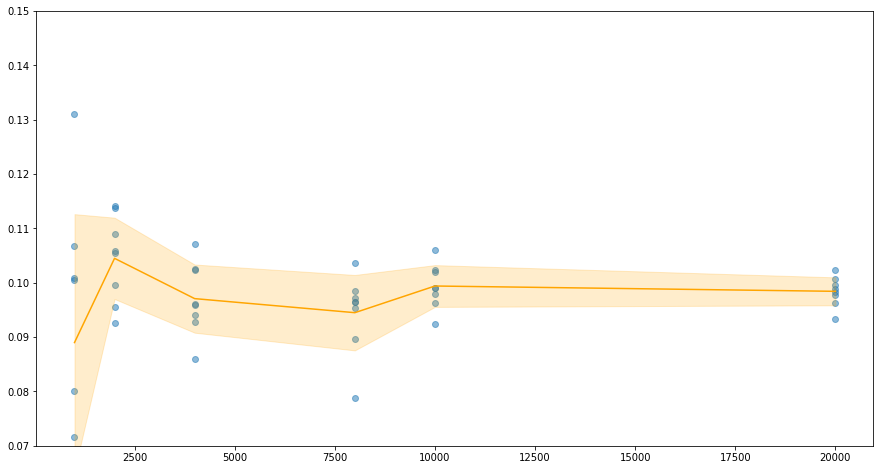

In [7]:
%matplotlib inline
plt.figure(figsize = (15, 8))
plt.scatter(plot_X.flatten(), ICNN_results.flatten(), alpha = 0.5)
plt.plot(sample_size, ICNN_mean, color = "orange")
plt.fill_between(sample_size, ICNN_mean - ICNN_std, ICNN_mean + ICNN_std, alpha = 0.2, color = "orange")
plt.ylim(0.07, 0.15)
plt.show()

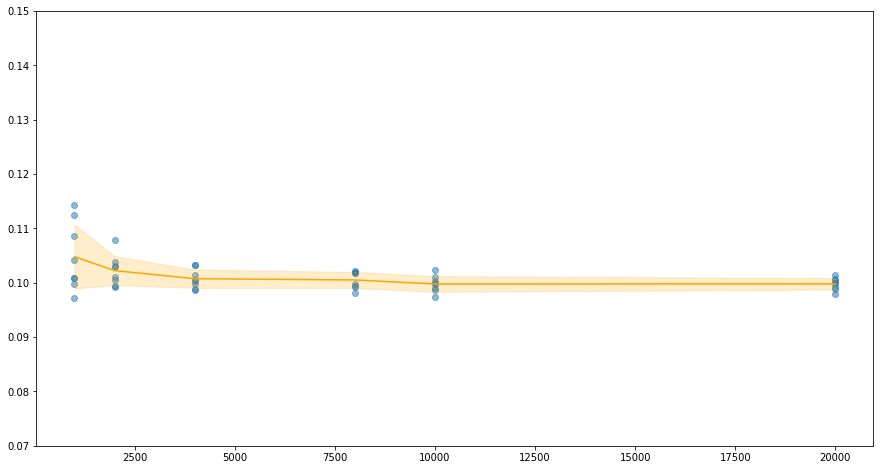

In [8]:
%matplotlib inline
plt.figure(figsize = (15, 8))
plt.scatter(plot_X.flatten(), POT_results.flatten(), alpha = 0.5)
plt.plot(sample_size, POT_mean, color = "orange")
plt.fill_between(sample_size, POT_mean - POT_std, POT_mean + POT_std, alpha = 0.2, color = "orange")
plt.ylim(0.07, 0.15)
plt.show()

In [20]:
ICNN_std > POT_std

array([ True,  True,  True,  True,  True,  True])